# Image Processing Assignment

Implement the basic image processing methods we've discussed in class: convolution/correlation, color histogram analysis, Canny edge detection.


In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/Colab Notebooks"

'Applying Stereo Depth to a Driving Scenario.ipynb'
 Color.ipynb
'CS231n Python Tutorial.ipynb'
 EdgeDetection.ipynb
 ImageProcessingAssignment.ipynb
 Images
 Logistic_Regression_with_a_Neural_Network_mindset_v6a.ipynb
 Math_Review_Eric.ipynb
 Optimization_methods_v1b.ipynb
'Quiz 1.ipynb'
'Quiz Q3 & Q4.ipynb'
 week7


## 1D Convolution
After loading the staircaase image included with scipy.misc
1. Calculate the height and width of the staircase image and display the image
2. Retrieve the first row of the image
3. Create a numpy array with the finite difference filter [-1, 1]
4. Apply the filter to one row of the image (no need to reverse it for convolution).  Please implement this yourself only using NumPy functions but not OpenCV or scipy
5. Plot the intensity of the first row and the output of the finite difference filter on a graph (the x value should be the index and the y value the intensity) 


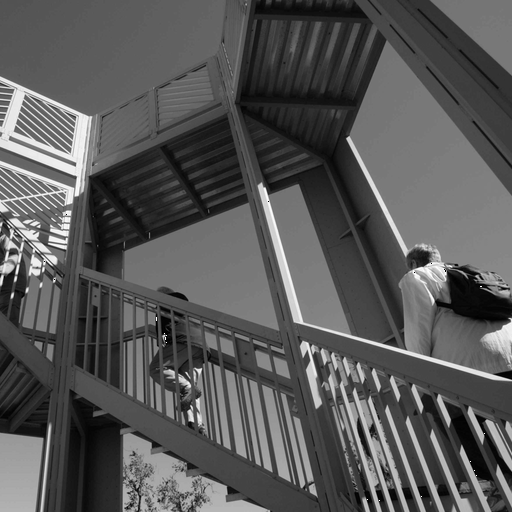

The size of the image is (512, 512)
Height = 512  Width = 512


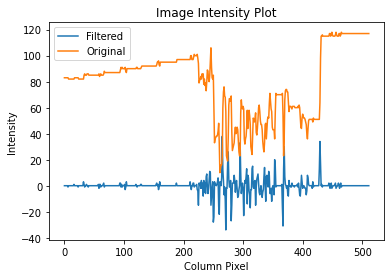

In [ ]:
#Required to use the imshow command within colab
from google.colab.patches import cv2_imshow

#Numpy, Matplotlib and OpenCV are required
import cv2
import matplotlib.pyplot as plt
import numpy as np


from scipy import misc
#load the staircase image
ascent=misc.ascent() 

cv2_imshow(ascent)
#what are the dimensions of the image?
dims = ascent.shape
rows, cols = dims
print("The size of the image is {}".format(dims))
print("Height = {}  Width = {}".format(rows, cols))

#retrieve the first row
first_row = ascent[0:1, :].reshape(cols)
#print(first_row.shape)

#create the 1x2 finite difference filter
finite_diff_filter = np.array([-1, 1])
#print(finite_diff_filter.shape)

#filter the row
#filtered_row = np.convolve(first_row, finite_diff_filter)
filtered_row = np.zeros(cols)
for i in range(cols - 1):
  filtered_row[i] = first_row[i + 1] - first_row[i]

#plot the image intensity and the filter output using plt.plot
row_len = len(filtered_row)
x = range(row_len)
plt.plot(x, filtered_row)
plt.plot(x, first_row)
plt.title('Image Intensity Plot')
plt.xlabel('Column Pixel')
plt.ylabel('Intensity')
plt.legend(['Filtered', 'Original'])
plt.show()


# 2D Linear Filters
1. Create 3x3 numpy arrays for the linear filter to highlight vertical edges and horizontal edges (consult Lecture 5)
2. Apply signal.convolve2d (see reference guide https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)
3. Display the original image and the 2 filtered images

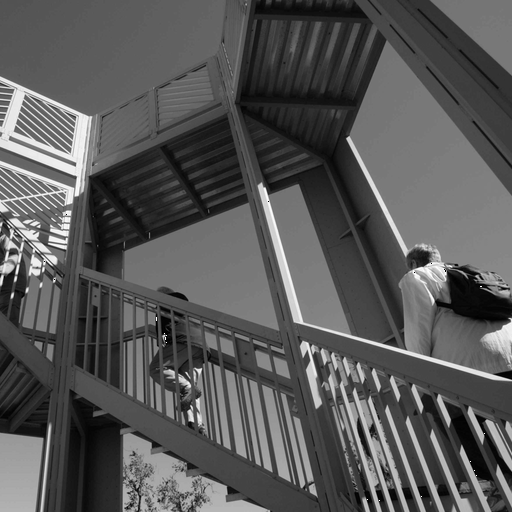

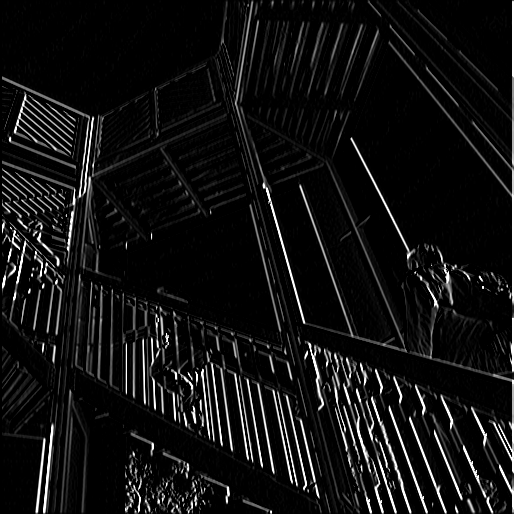

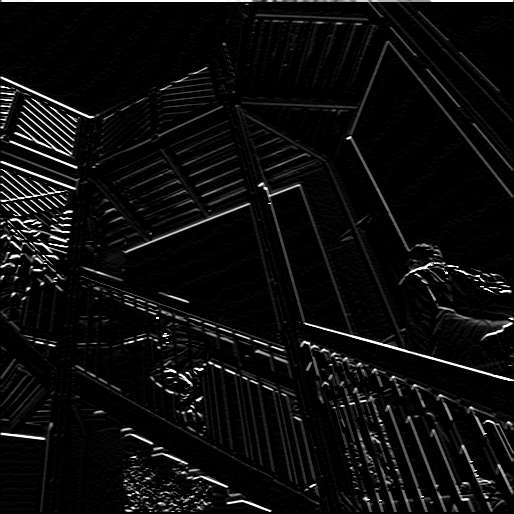

In [ ]:
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt

ascent=misc.ascent()


#create the numpy filters
vert_filter = np.array([[-1, 0, 1],
                        [-1, 0, 1],
                        [-1, 0, 1]])

horz_filter = np.array([[ 1, 1, 1],
                        [ 0, 0, 0],
                        [-1,-1,-1]])

#apply them using signal.convolve2d
vert_filter_image = signal.convolve2d(vert_filter, ascent)
horz_filter_image = signal.convolve2d(horz_filter, ascent)

#display the original imaage and the filtered images
cv2_imshow(ascent)
cv2_imshow(vert_filter_image)
cv2_imshow(horz_filter_image)



## OpenCV Template Matching
Evaluate the performance of 2 OpenCV template matching options (cv2.TM_COEFF and TM_CCORR) at finding Waldo.  You are allowed to use any OpenCV methods that you wish.
https://docs.opencv.org/master/d4/dc6/tutorial_py_template_matching.html
1. Load and display the puzzle image and the query image. Calculate the height and the width of the query image (Waldo).  
2. Apply the template matching method and display the result.
3. Find the location of the max value in the result.
4. Make a copy of the puzzle image using copy() and draw a rectangle on the maximum location.  To size the rectangle, use the height and width of the Waldo query image. (the reason you are making a copy is to avoid drawing rectangles from both the methods on the same image).
5. Display the image with the rectangle drawn.
6. Repeat the procedure using the other method
7. Report which method correctly finds Waldo.



In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


Load puzzle image and display it

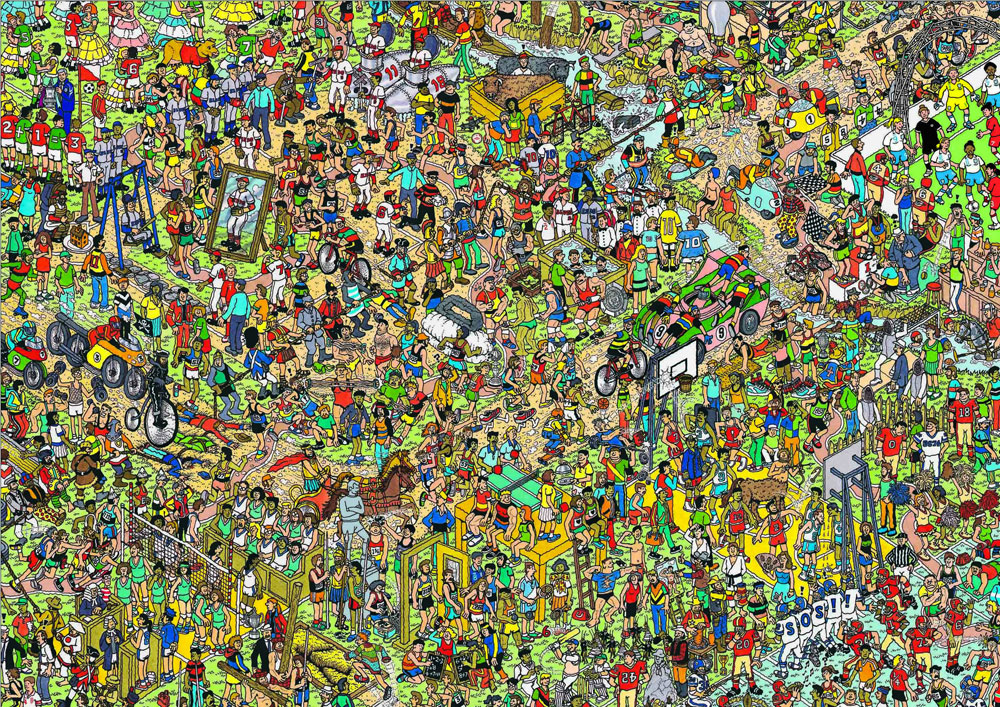

In [ ]:
scene = cv2.imread("/content/drive/My Drive/Colab Notebooks/Images/puzzle_1.jpg")
cv2_imshow(scene)

Load query image and display it

In [ ]:
waldo = cv2.imread("/content/drive/My Drive/Colab Notebooks/Images/query_1.jpg")
cv2_imshow(waldo)

Get the dimensions of Waldo's image

In [ ]:
waldo_dims = waldo.shape[0:2]
print("The size of Waldo's image is {}".format(waldo_dims))

The size of Waldo's image is (33, 15)


Perform template matching using the matchTemplate function in openCV which slides template image over scene image and get scores for matches at each position

Try using both cv2.TM_COEFF and TM_CCORR

Report which one gets the correct answer.

In [ ]:
# comparison methods: 
# - TM_CCOEFF = cross-correlation
# - TM_CCORR  = correlation coefficient

# compare template (waldo) against image (scene) 
corr_map_CCOEFF = cv2.matchTemplate(scene, waldo, eval('cv2.TM_CCOEFF'))
corr_map_CCORR  = cv2.matchTemplate(scene, waldo, eval('cv2.TM_CCORR'))

# find best match and its location
_, max_val_CCOEFF, _, max_loc_CCOEFF = cv2.minMaxLoc(corr_map_CCOEFF)
_, max_val_CCORR , _, max_loc_CCORR  = cv2.minMaxLoc(corr_map_CCORR)

match = {"method"  : ['cv2.TM_CCOEFF', 'cv2.TM_CCORR'],
         "max_val" : [max_val_CCOEFF, max_val_CCORR],
         "max_loc" : [max_loc_CCOEFF, max_loc_CCORR],
         "map"     : [corr_map_CCOEFF, corr_map_CCORR]}

#print("CCOEFF = %d" % (max_val_CCOEFF))
#print("CCORR  = %d" % (max_val_CCORR))

# determine best method
#max_val = max(match["max_val"])
#max_idx = match["max_val"].index(max_val) #oof this didn't actually work
#max_idx = 0 

#print("The best comparison method is {}".format(match["method"][max_idx]))

Display the results using Matplotlib

The correlation map using cv2.TM_CCOEFF is:


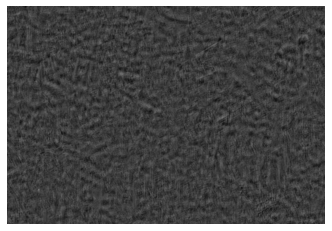

The correlation map using cv2.TM_CCORR is:


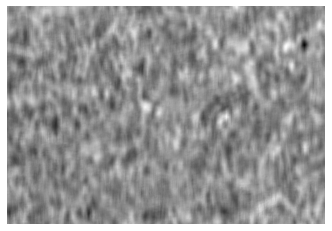

In [ ]:
for i in range(2):
  result = match["map"][i]
  print("The correlation map using {} is:".format(match["method"][i]))
  plt.imshow(result, cmap='gray')
  plt.axis('off')
  plt.show()

Find the highest score and print the location where it is located in the image

In [ ]:
for i in range(2):
 print("The highest score using {} is {}".format(match["method"][i], match["max_val"][i]))
 print("The location of waldo is {}\n".format(match["max_loc"][i]))

The highest score using cv2.TM_CCOEFF is 6299312.5
The location of waldo is (98, 569)

The highest score using cv2.TM_CCORR is 34931648.0
The location of waldo is (866, 125)



Make a copy of puzzle image

In [ ]:
copied_image = scene.copy()

Draw rectangle on image where the best score is found using a color that the TA can see using cv2.rectangle and display the image

In [ ]:
# determine size of rectangle
waldo_height = waldo_dims[0]
waldo_width  = waldo_dims[1]

start_point = match["max_loc"][0]
end_point   = (start_point[0] + waldo_width, start_point[1] + waldo_height)

# draw rectangle around Waldo
dummy_var = cv2.rectangle(scene, start_point, end_point, 255, 2)

Display image using OpenCV

Template matching using cv2.TM_CCOEFF:


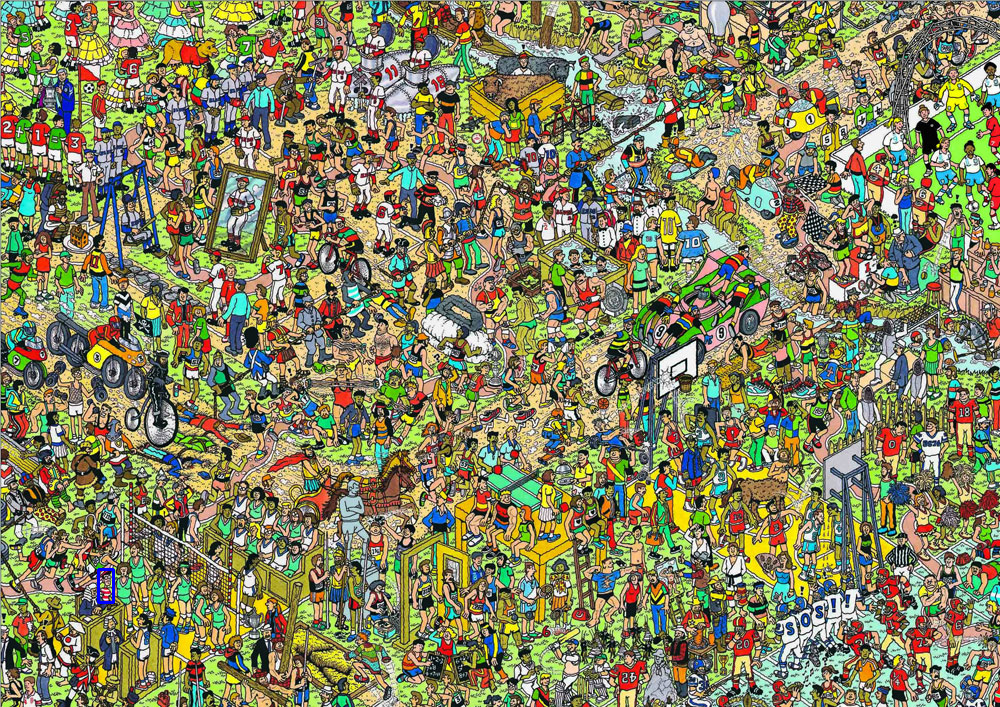

In [ ]:
from google.colab.patches import cv2_imshow
print("Template matching using {}:".format(match["method"][0]))
cv2_imshow(scene)

Template matching using cv2.TM_CCORR:


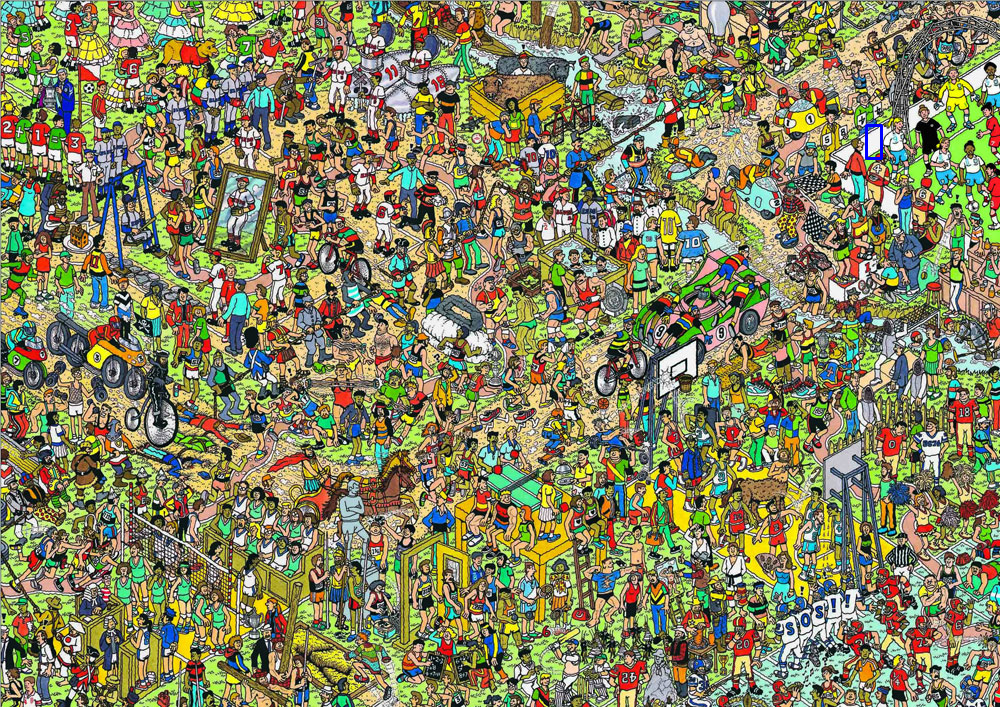

In [ ]:
# repeat for other template matching method
start_point = match["max_loc"][1]
end_point   = (start_point[0] + waldo_width, start_point[1] + waldo_height)
dummy_var = cv2.rectangle(copied_image, start_point, end_point, 255, 2)

print("Template matching using {}:".format(match["method"][1]))
cv2_imshow(copied_image)

In [ ]:
print("The best comparison method is {}".format(match["method"][0]))

The best comparison method is cv2.TM_CCOEFF


## Color Histograms

1. Load the images of the parrot, group of parrots and the vacuum cleaner.
2. Display the images.
3. Calculate the color histogram of the images and normalize them. Please consult the OpenCV documentation for this: https://docs.opencv.org/3.4/d8/dbc/tutorial_histogram_calculation.html  Remember that by default openCV loads images using BGR convention.
4. Plot the color histograms for the blue, green, and red values (preferably on the same axes using a bin size of 256)).  Do this for each of the three images.
5. Recalculate the histograms using bin sizes of [8, 8, 8] for b,g,r and compare them using compareHist cv2.HISTCMP_INTERSECT (intersection).  Print the results of comparing the parrot image to itself, to the group of parrots and to the vacuum cleaner.

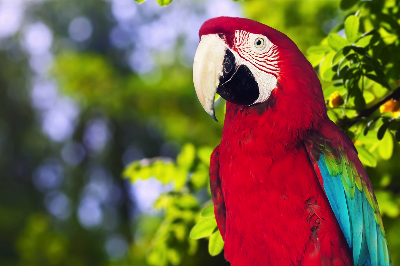

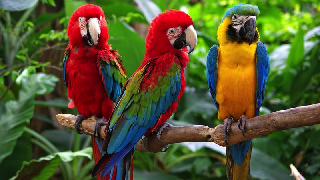

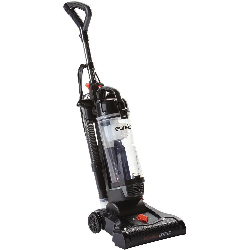

In [ ]:
parrot = cv2.imread("/content/drive/My Drive/Colab Notebooks/Images/single-parrot-small.png")
parrot_group = cv2.imread("/content/drive/My Drive/Colab Notebooks/Images/group-parrot-small.png")
vacuum = cv2.imread("/content/drive/My Drive/Colab Notebooks/Images/eureka-vacuum-small.png")

cv2_imshow(parrot)
cv2_imshow(parrot_group)
cv2_imshow(vacuum)

images  = [parrot, parrot_group, vacuum]

In [ ]:
def create_histogram(images, bin_size):
  '''
  displays a color histogram for each image

  arguments:
  images   -- list of images 
  bin_size -- size of histogram bins (int)

  return:
  histogram_list -- list of histogram images
  '''
  
  histogram_list = []

  # set histogram params
  hist_size  = bin_size # e.g. 256 or 8
  hist_range = (0, 256)
  hist   = []
  hist_w = 512
  hist_h = 400
  bin_w  = int(round(hist_w/ hist_size))
  rgb_val = [( 255, 0, 0), ( 0, 255, 0), ( 0, 0, 255)] # B,G,R

  for image_idx, image in enumerate(images):

    # split image into B,G,R planes
    bgr_planes = cv2.split(image)

    # initialize histogram
    # dtype must be 'np.float32' for cv2.compareHist() to work properly
    hist_image = np.zeros((hist_h, hist_w, 3), dtype=np.float32)

    # for each B,G,R plane
    for color_idx, color in enumerate(bgr_planes):

      # calculate histogram and normalize
      color_hist = cv2.calcHist(bgr_planes, [color_idx], None, [hist_size], hist_range, accumulate = False)
      cv2.normalize(color_hist, color_hist, alpha = 0, beta = hist_h, norm_type = cv2.NORM_MINMAX, dtype=cv2.CV_32F)     

      # draw histogram
      for i in range(1, hist_size):

        cv2.line(hist_image, ( bin_w*(i-1), hist_h - int(np.round(color_hist[i-1])) ),
                             ( bin_w*(i),   hist_h - int(np.round(color_hist[i])) ), 
                              rgb_val[color_idx], thickness=2)

    cv2_imshow(hist_image)
    # title str(images[image_idx]) + 'histogram'
    histogram_list.append(hist_image)

  return histogram_list

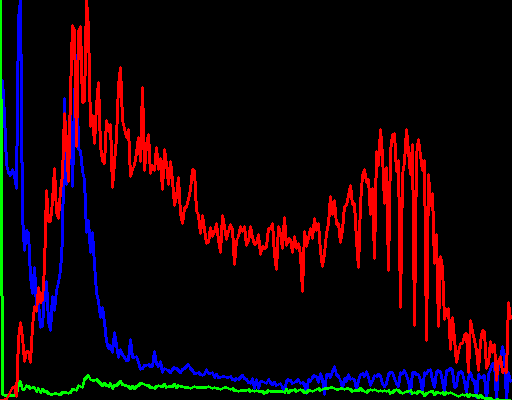

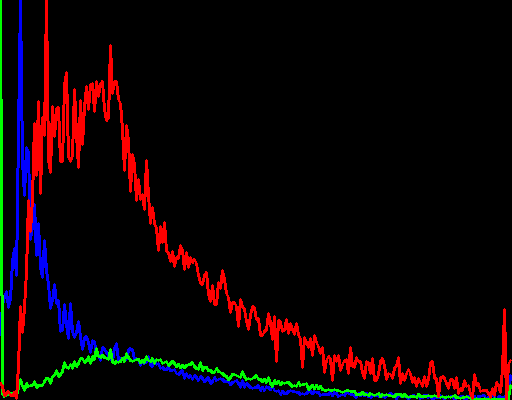

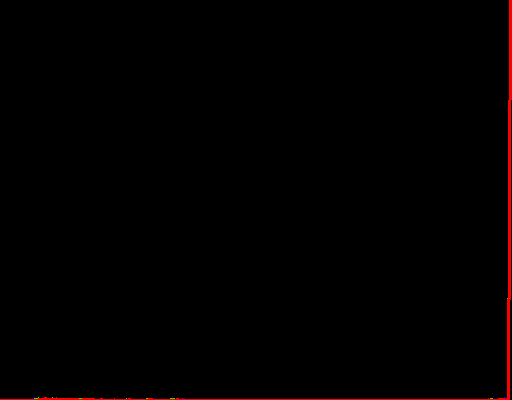

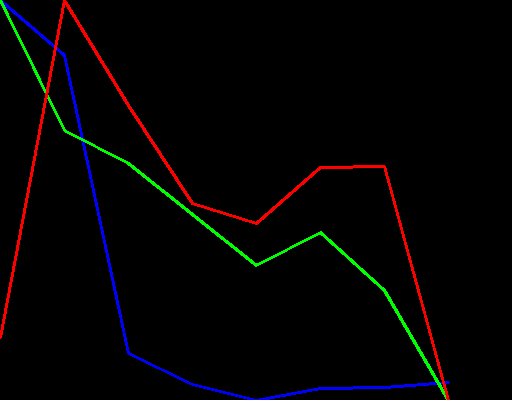

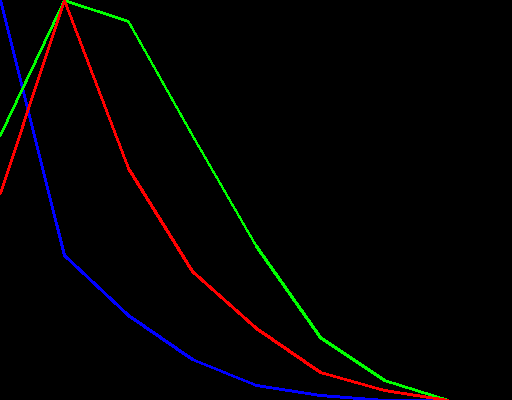

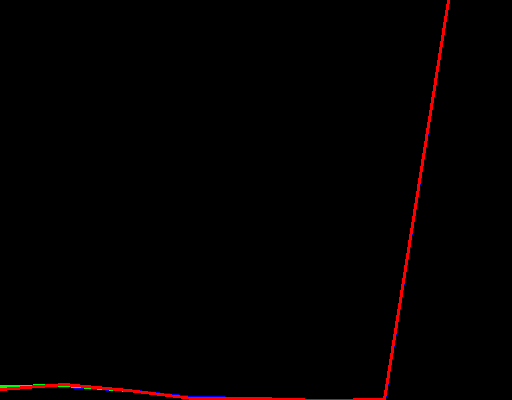

In [ ]:
# create histograms w/ bin size = [256, 256, 256]
create_histogram(images, 256)

# create histograms w/ bin size = [8, 8, 8]
histograms = create_histogram(images, 8)

In [ ]:
parrot_hist       = histograms[0]
parrot_group_hist = histograms[1]
vacuum_hist       = histograms[2]

#print(type(parrot_hist[0][0][0]))

# compare histograms
comp_1 = cv2.compareHist(parrot_hist, parrot_hist, cv2.HISTCMP_INTERSECT)
comp_2 = cv2.compareHist(parrot_hist, parrot_group_hist, cv2.HISTCMP_INTERSECT)
comp_3 = cv2.compareHist(parrot_hist, vacuum_hist, cv2.HISTCMP_INTERSECT)

print("Parrot compared with itself: {}".format(comp_1))
print("Parrot compared with group of parrots: {}".format(comp_2))
print("Parrot compared with vacuum: {}".format(comp_3))


Parrot compared with itself: 1825800.0
Parrot compared with group of parrots: 29835.0
Parrot compared with vacuum: 4845.0


## Canny Edge Detection

1. Convert the parrot image to grayscale
2. Apply the Canny edge detection OpenCV function it with low threshold of 100 and high threshold of 200.
3. Display the result.

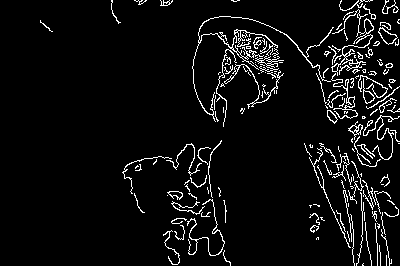

In [ ]:
# convert to grayscale
gray_parrot = cv2.cvtColor(parrot, cv2.COLOR_BGR2GRAY)

# define edge thresholding for Canny
low_thresh = 100
high_thresh = 200

# apply Canny edge detection
canny_parrot = cv2.Canny(gray_parrot, low_thresh, high_thresh)

# display result
cv2_imshow(canny_parrot)


